In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img,img_to_array
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential 
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,LSTM,BatchNormalization
from keras.layers import Flatten
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_data = '/content/drive/MyDrive/Colab Notebooks/Image'
validation = ImageDataGenerator(rescale=1./255)
valid_data = '/content/drive/MyDrive/Colab Notebooks/Image'

In [ ]:
train_dataset = train.flow_from_directory(train_data, target_size = (256,256), batch_size = 10, class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(valid_data, target_size = (256,256), batch_size = 10, class_mode = 'categorical')

Found 455 images belonging to 10 classes.
Found 455 images belonging to 10 classes.


In [ ]:
train_dataset.class_indices

{'Ba Trong': 0,
 'Dat': 1,
 'Minh Thanh': 2,
 'Nha': 3,
 'Nhut': 4,
 'Tan': 5,
 'Tan Thanh': 6,
 'Tuan Giang': 7,
 'nhan': 8,
 'phat': 9}

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape=(256,256,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform',))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                  

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9) # lr learning rate : tốc độ học
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(train_dataset,epochs=10,batch_size=20,validation_data=validation_dataset,verbose=1)

Epoch 1/10
46/46 [==============================] - 229s 5s/step - loss: 4.8297 - accuracy: 0.3319 - val_loss: 1.3887 - val_accuracy: 0.5121
Epoch 2/10
46/46 [==============================] - 259s 6s/step - loss: 1.0183 - accuracy: 0.6593 - val_loss: 0.2301 - val_accuracy: 0.9319
Epoch 3/10
46/46 [==============================] - 265s 6s/step - loss: 0.7486 - accuracy: 0.8308 - val_loss: 0.0812 - val_accuracy: 0.9736
Epoch 4/10
46/46 [==============================] - 224s 5s/step - loss: 0.5755 - accuracy: 0.8747 - val_loss: 0.2848 - val_accuracy: 0.9143
Epoch 5/10
46/46 [==============================] - 259s 6s/step - loss: 0.3807 - accuracy: 0.9297 - val_loss: 0.0521 - val_accuracy: 0.9934
Epoch 6/10
46/46 [==============================] - 257s 6s/step - loss: 1.3789 - accuracy: 0.9407 - val_loss: 0.0146 - val_accuracy: 0.9956
Epoch 7/10
46/46 [==============================] - 257s 6s/step - loss: 0.5978 - accuracy: 0.9385 - val_loss: 0.2743 - val_accuracy: 0.9253
Epoch 8/10
46

In [ ]:
model.save('Face10.h5')

In [ ]:
Face10_model = load_model('Face10.h5')

In [ ]:
score=Face10_model.evaluate(validation_dataset,verbose=1)
print('Test loss = ',score[0])
print('Test accuracy = ',score[1])

46/46 [==============================] - 46s 981ms/step - loss: 0.0168 - accuracy: 0.9956
Test loss =  0.01676643267273903
Test accuracy =  0.995604395866394


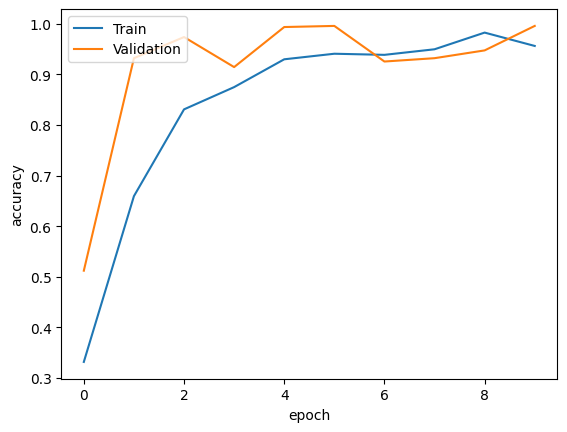

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

1/1 [==============================] - 0s 273ms/step
Predict is:  Nhan


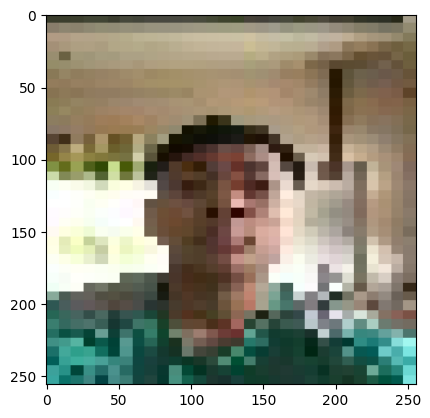

In [ ]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/Face images /Testing_data/Hong Nhan/nhn11.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
Label = ['Dat','Tan','Tan Thanh','Ba Trong','Minh Thanh','Nhut','Nha','Tuan Giang','Nhan','phat']
print('Predict is: ',Label[int(np.argmax(Face10_model.predict(img),axis=-1))])

1/1 [==============================] - 0s 151ms/step
Predict is:  Tan Thanh


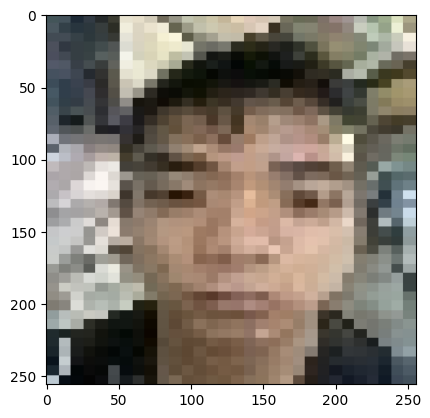

In [ ]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/Face images /Testing_data/Minh Thanh/Thanh1.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
Label = ['Dat','Tan','Tan Thanh','Ba Trong','Minh Thanh','Nhut','Nha','Tuan Giang','Nhan','phat']
print('Predict is: ',Label[int(np.argmax(Face10_model.predict(img),axis=-1))])

1/1 [==============================] - 0s 157ms/step
Predict is:  Dat


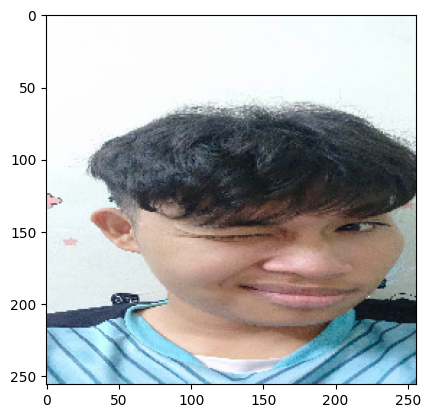

In [ ]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/Image/Dat/330271565_1461410234596877_2261443984632201285_n.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,256,256,3)
img = img.astype('float32')
img = img/255
Label = ['Tan','Dat','Tan Thanh','Ba Trong','Minh Thanh','Nhut','Nha','Tuan Giang','Nhan','phat']
print('Predict is: ',Label[int(np.argmax(Face10_model.predict(img),axis=-1))])